In [1]:
# 경고 메세지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold
from sklearn.model_selection import KFold           # 랜덤하게 섞어서 자를 수도 있고, 순서대로 자를 수도 있음
from sklearn.model_selection import StratifiedKFold # 결과 데이터의 비율이 최대한 균등하게 들어갈 수 있도록!

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family']='Malgun Gothic'
# 맥용 plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터를 읽어온다
# 컬럼 이름

column_list = ['임신횟수', '혈당', '혈압', '근육피부두께', '인슐린', '체질량', '가족력', '나이', '당뇨여부']

df1 = pd.read_csv('../../data/pima-indians-diabetes.csv', names=column_list)
df1.head()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 전반적인 정보를 확인한다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신횟수    768 non-null    int64  
 1   혈당      768 non-null    int64  
 2   혈압      768 non-null    int64  
 3   근육피부두께  768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   체질량     768 non-null    float64
 6   가족력     768 non-null    float64
 7   나이      768 non-null    int64  
 8   당뇨여부    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df1.isnull().sum()

임신횟수      0
혈당        0
혈압        0
근육피부두께    0
인슐린       0
체질량       0
가족력       0
나이        0
당뇨여부      0
dtype: int64

In [5]:
# 전반적인 통계 정보를 확인한다

df1.describe()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 컬럼 간의 상관관계를 가져온다

df1.corr()

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이,당뇨여부
임신횟수,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
혈당,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
근육피부두께,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
인슐린,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
체질량,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
가족력,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
당뇨여부,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


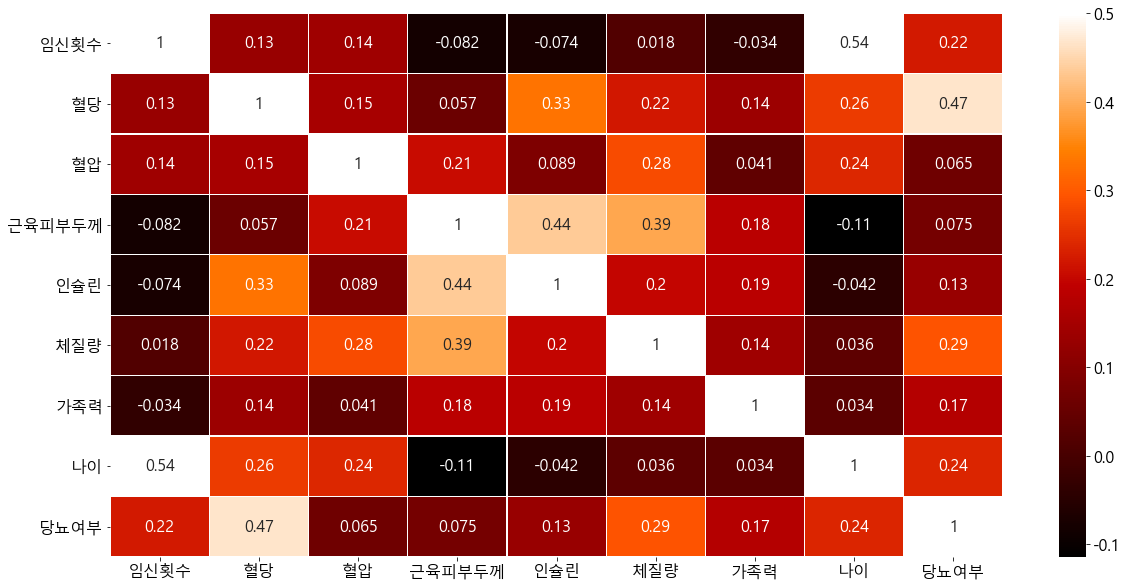

In [7]:
# 각 컬럼의 상관관계를 한 눈에 볼 수 있도록 고안된 그래프
# 밝으면 상관관계가 깊다라고 할 수 있다
# 첫 번째 : 각 컬럼간 상관관계 수치를 가진 데이터 프레임
# linewidths : 외곽선 두께
# vmax : 색상의 농도
# cmap : 컬러맵
# linecolor : 외곽선 색상
# annot : True를 주면 각 칸에 수치를 표시해 준다

sns.heatmap(df1.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot=True)
plt.show()

In [8]:
# 시드 설정
np.random.seed(3)
tf.random.set_seed(3)

In [9]:
# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid' ))

In [10]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 입력과 결과로 나눈다
X = df1.drop('당뇨여부', axis=1)
Y = df1['당뇨여부']

display(X)
display(Y)

,임신횟수,혈당,혈압,근육피부두께,인슐린,체질량,가족력,나이
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 당뇨여부, Length: 768, dtype: int64

In [12]:
# 학습
# 시작 시간

now = time.time()

model.fit(X, Y, epochs=200, batch_size=10, verbose=0)

# 경과시간
print(f'경과시간 : {time.time()-now}')

경과시간 : 37.990105628967285


In [13]:
# 정확도 확인
print(f'정확도 : {model.evaluate(X, Y)[1]}')

24/24 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8203
정확도 : 0.8203125


### 성능이 만족을 안 할 때
1. epochs 늘리기